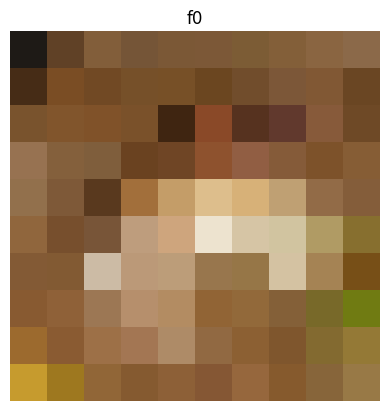

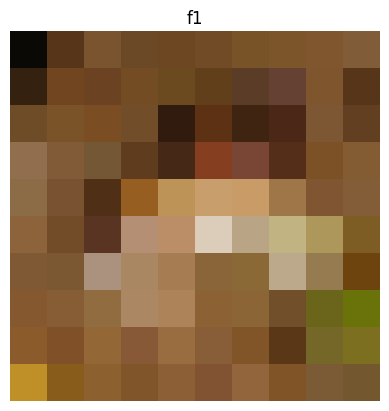

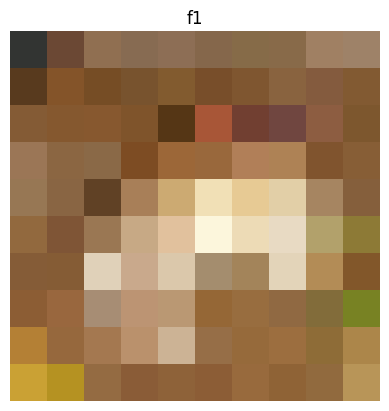

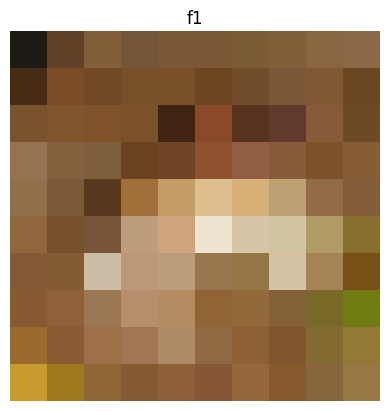

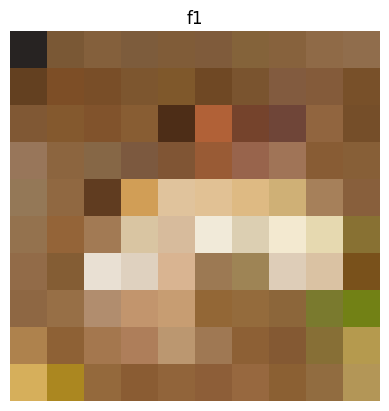

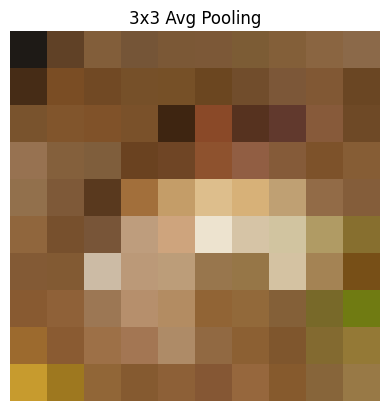

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.

def debug_custom_pooling(img, pool_size=(3,3), strides=3):
    k_h, k_w = pool_size
    img = img[tf.newaxis, ...]  # (1,H,W,C)

    patches = tf.image.extract_patches(
        images=img,
        sizes=[1, k_h, k_w, 1],
        strides=[1, strides, strides, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )
    batch_size = tf.shape(img)[0]
    channels = tf.shape(img)[-1]
    out_h, out_w = tf.shape(patches)[1], tf.shape(patches)[2]

    patches = tf.reshape(patches, [batch_size, out_h, out_w, k_h, k_w, channels])
    row_sum = tf.reduce_sum(patches, axis=4)  # (B, OH, OW, H, C)
    col_sum = tf.reduce_sum(patches, axis=3)  # (B, OH, OW, W, C)
    f0 = tf.reduce_mean(patches, axis=[3, 4])   # (B, OH, OW, C)
    f1 = row_sum / tf.cast(k_w, tf.float32)     # (B, OH, OW, H, C)
    f2 = col_sum / tf.cast(k_h, tf.float32)  # (B, OH, OW, W, C)

    f1_min=tf.reduce_min(f1,axis=3)
    f2_min=tf.reduce_min(f2,axis=3)

    f1_max=tf.reduce_max(f1,axis=3)
    f2_max=tf.reduce_max(f2,axis=3)

    f1_avg=tf.reduce_mean(f1,axis=3)
    f2_avg=tf.reduce_mean(f2,axis=3)
    return f0[0].numpy(), f1_min[0].numpy(), f2_min[0].numpy(), f1_max[0].numpy(), f2_max[0].numpy(), f1_avg[0].numpy(), f2_avg[0].numpy()

# Örnek bir görüntü alalım
sample_image = x_train[0]
f0, f1_min, f2_min,f1_max,f2_max,f1_avg,f2_avg = debug_custom_pooling(sample_image)

# f0 shape: (OH, OW, C), örneğin 10x10 gibi
# f1 shape: (OH, OW, H, C) => her çıktının içerdiği H vektör
# f2 shape: (OH, OW, W, C) => her çıktının içerdiği W vektör

# f0'ı görselleştir (kanalları topla ya da örneğin ilk kanalı göster)
plt.title("f0")
plt.imshow(f0)
plt.axis("off")
plt.show()

plt.title("f1")
plt.imshow(f1_min)
plt.axis("off")
plt.show()

plt.title("f1")
plt.imshow(f1_max)
plt.axis("off")
plt.show()

plt.title("f1")
plt.imshow(f1_avg)
plt.axis("off")
plt.show()

plt.title("f1")
plt.imshow(f2_max)
plt.axis("off")
plt.show()
imgtensor=sample_image[tf.newaxis,...]

pooled = tf.nn.avg_pool(imgtensor, ksize=3, strides=3, padding='VALID')[0]

plt.imshow(pooled.numpy().astype('float32'))
plt.axis('off')
plt.title('3x3 Avg Pooling')
plt.show()